In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pydotplus # viz stuff

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # export_graphviz() method

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from IPython.display import Image # viz stuff

In [2]:
df = pd.read_csv("data/data_understanding_output.csv", skipinitialspace=True)
df_train = df.drop(['word','PoS', 'length', 'number_of_meanings', 'avg_variance_between_meanings', 'sentiment'], axis=1)

In [3]:
df_train.head()

,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,log_freq
0,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,5.204321
1,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,6.625813
2,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,5.146454
3,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,5.093852
4,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,5.107695


In [4]:
attributes = [col for col in df_train.columns if col != 'polysemy']
X = df_train[attributes].values
y = df_train['polysemy']

In [33]:
# Questo blocco ci mette un botto ad eseguire e serve solo a trovare i parametri migliori

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

twotwenty = list(range(2,20))
    
param_list = {'max_depth': [None] + twotwenty,
             'min_samples_split': twotwenty,
             'min_samples_leaf': list(range(1,20))
             }

grid_search = GridSearchCV(clf, param_grid=param_list, scoring='f1')
grid_search.fit(X, y)

res = grid_search.cv_results_

report(res, n_top=3)

Model with rank: 1
Mean validation score: 0.182 (std: 0.028)
Parameters: {'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 15}

Model with rank: 2
Mean validation score: 0.182 (std: 0.022)
Parameters: {'max_depth': 17, 'min_samples_leaf': 3, 'min_samples_split': 4}

Model with rank: 3
Mean validation score: 0.181 (std: 0.037)
Parameters: {'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 4}



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [34]:
clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=12 ,
                             min_samples_split=3,
                             min_samples_leaf=15,
                            )

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=15, min_samples_split=3)

In [35]:
imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(attributes)}
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}

{'log_freq': 0.23138705053558467,
 'semsize': 0.1384165586121318,
 'imageability': 0.12839671969508898,
 'familiarity': 0.09648290952122619,
 'gender': 0.09479750657900925,
 'aoa': 0.07831667369672156,
 'valence': 0.07539061001583552,
 'concreteness': 0.06759986592400455,
 'arousal': 0.05560540561137534,
 'dominance': 0.03360669980902215}

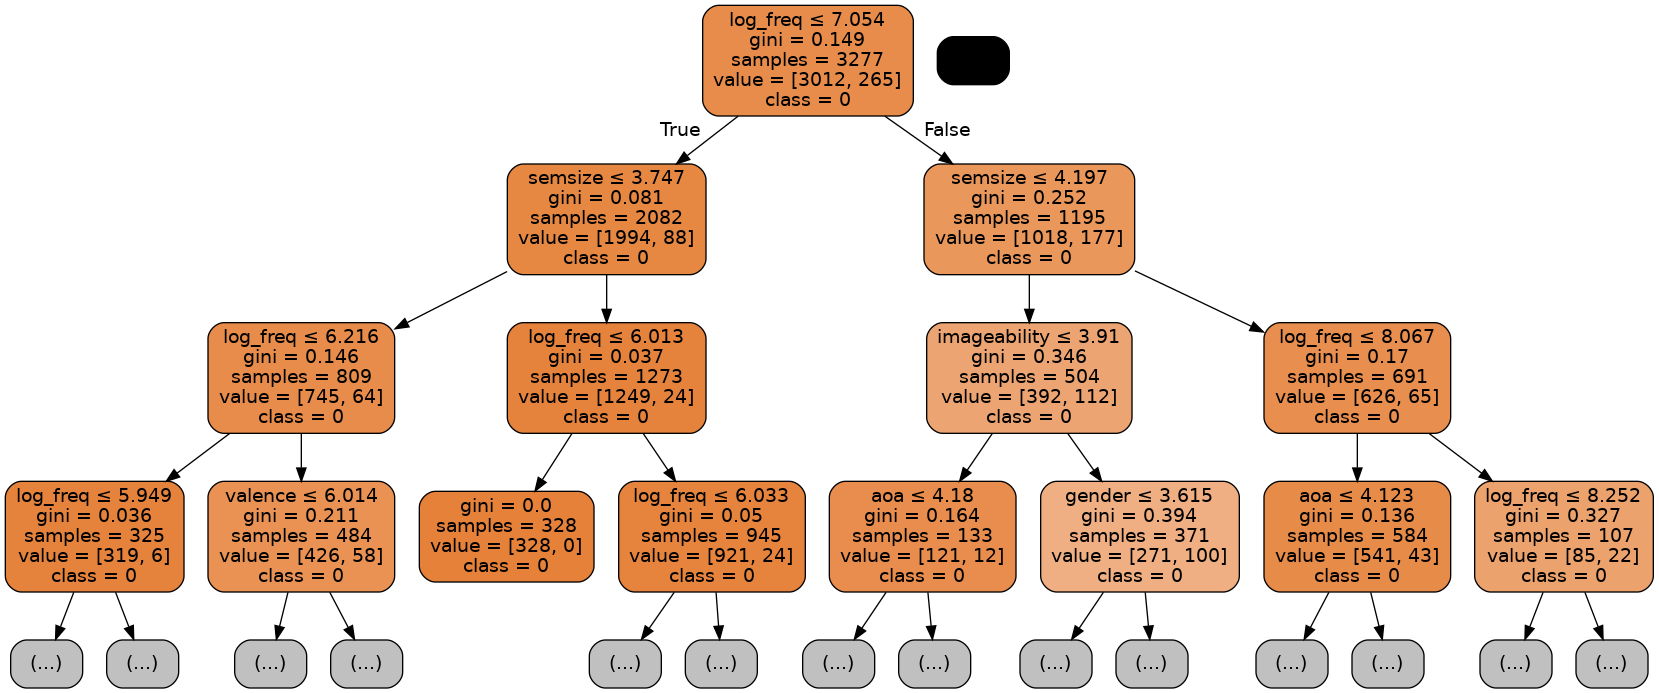

In [36]:
dot_data = tree.export_graphviz (clf, out_file=None,
                                feature_names=attributes,
                                class_names=[str(v) for v in clf.classes_],
                                filled=True, rounded=True,
                                special_characters=True,
                                max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [37]:
y_pred = clf.predict(X_train)

In [38]:
print( classification_report(y_train, y_pred) )

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3012
           1       0.62      0.21      0.31       265

    accuracy                           0.93      3277
   macro avg       0.78      0.60      0.64      3277
weighted avg       0.91      0.93      0.91      3277



In [39]:
y_pred = clf.predict(X_test)

In [40]:
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1291
           1       0.17      0.04      0.07       114

    accuracy                           0.90      1405
   macro avg       0.54      0.51      0.51      1405
weighted avg       0.86      0.90      0.88      1405

